# Proyecto Final

## Introducción

## Descripción de los Datos


### Temperatura

Algunos dicen que el cambio climático es la mayor amenaza de nuestra era, mientras que otros dicen que es un mito basado en ciencia dudosa. Le estamos entregando algunos de los datos para que pueda formar su propia opinión.

Incluso más que con otros conjuntos de datos que ha presentado Kaggle, hay una gran cantidad de limpieza y preparación de datos que se necesita para armar un estudio a largo plazo de las tendencias climáticas. Los primeros datos fueron recopilados por técnicos que usaban termómetros de mercurio, donde cualquier variación en el tiempo de visita afectaba las mediciones. En la década de 1940, la construcción de aeropuertos provocó el traslado de muchas estaciones meteorológicas. En la década de 1980, hubo un movimiento hacia los termómetros electrónicos que, según se dice, tienen un sesgo de enfriamiento.

Dada esta complejidad, existe una variedad de organizaciones que recopilan datos de tendencias climáticas. Los tres conjuntos de datos de temperatura terrestre y oceánica más citados son MLOST de la NOAA, GISTEMP de la NASA y HadCrut del Reino Unido.

Hemos vuelto a empaquetar los datos de una compilación más reciente realizada por Berkeley Earth, que está afiliado al Laboratorio Nacional Lawrence Berkeley. El estudio de temperatura de la superficie terrestre de Berkeley combina 1600 millones de informes de temperatura de 16 archivos preexistentes. Está muy bien empaquetado y permite dividirlo en subconjuntos interesantes (por ejemplo, por país). Publican los datos de origen y el código de las transformaciones que aplicaron. También utilizan métodos que permiten incluir observaciones meteorológicas de series temporales más cortas, lo que significa que es necesario desechar menos observaciones.

### Huracanes

El Centro Nacional de Huracanes (NHC) realiza un análisis posterior a la tormenta de cada ciclón tropical en el Atlántico
cuenca (es decir, el Océano Atlántico Norte, el Golfo de México y el Mar Caribe) y el Océano Pacífico Norte para determinar la evaluación oficial de la historia del ciclón. Este análisis hace uso de todas las observaciones disponibles, incluidas aquellas que pueden no haber estado disponibles en tiempo real. Además, el NHC lleva a cabo revisiones continuas de cualquier análisis retrospectivo de ciclones tropicales que se le llame la atención y periódicamente actualiza el registro histórico para reflejar
cambios introducidos.

El NHC publica la base de datos histórica de ciclones tropicales en un formato conocido como HURDAT, abreviatura de HURricane DATabase. Estas bases de datos (Atlantic HURDAT2 y NE/NC Pacific HURDAT2) contienen información cada seis horas sobre la ubicación, los vientos máximos, la presión central y (a partir de 2004) el tamaño de todos los ciclones tropicales y subtropicales conocidos.



## Preprocesamiento

In [ ]:
import pandas as pd
import math

Primero leeremos los tres conjuntos de datos y se mostrarán algunos registros.

In [ ]:
# Leer los datos
T_global = pd.read_csv('/work/Data/Temperaturas/GlobalTemperatures.csv')
# Crear columna de Año
T_global['Year'] = T_global['dt'].astype(str).str[0:4].astype(int)
T_global

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  Year  
0                                           NaN  1750  
1                                           NaN  1750  
2                                           NaN  1750  
3                                           NaN  1750  
4                                           NaN  1750  
...                                         ...   ...  
3187                                      0.057  2015  
3188                                      0.058  2015  
3189                                      0.062  2015  
3190                                      0.063  2015  
3191                                      0.062  2015  

[3192 rows x 10 columns]

In [ ]:
T_estado = pd.read_csv('/work/Data/Temperaturas/GlobalLandTemperaturesByState.csv')
T_estado

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1855-05-01              25.544                          1.171   
1       1855-06-01              24.228                          1.103   
2       1855-07-01              24.371                          1.044   
3       1855-08-01              25.427                          1.073   
4       1855-09-01              25.675                          1.014   
...            ...                 ...                            ...   
645670  2013-05-01              21.634                          0.578   
645671  2013-06-01              24.679                          0.596   
645672  2013-07-01              29.272                          1.340   
645673  2013-08-01              29.202                          0.869   
645674  2013-09-01                 NaN                            NaN   

           State Country  
0           Acre  Brazil  
1           Acre  Brazil  
2           Acre  Brazil  
3           Acre  Brazil  
4           Acre  Brazil  
...          ...     ...  
645670  Zhejiang   China  
645671  Zhejiang   China  
645672  Zhejiang   China  
645673  Zhejiang   China  
645674  Zhejiang   China  

[645675 rows x 5 columns]

In [ ]:
H_atlantico = pd.read_csv('/work/Data/Huracanes/atlantic.csv')
H_atlantico

ID                 Name      Date  Time Event Status Latitude  \
0      AL011851              UNNAMED  18510625     0           HU    28.0N   
1      AL011851              UNNAMED  18510625   600           HU    28.0N   
2      AL011851              UNNAMED  18510625  1200           HU    28.0N   
3      AL011851              UNNAMED  18510625  1800           HU    28.1N   
4      AL011851              UNNAMED  18510625  2100     L     HU    28.2N   
...         ...                  ...       ...   ...   ...    ...      ...   
49100  AL122015                 KATE  20151112  1200           EX    41.3N   
49101  AL122015                 KATE  20151112  1800           EX    41.9N   
49102  AL122015                 KATE  20151113     0           EX    41.5N   
49103  AL122015                 KATE  20151113   600           EX    40.8N   
49104  AL122015                 KATE  20151113  1200           EX    40.7N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
0         94.8W            80              -999  ...         -999   
1         95.4W            80              -999  ...         -999   
2         96.0W            80              -999  ...         -999   
3         96.5W            80              -999  ...         -999   
4         96.8W            80              -999  ...         -999   
...         ...           ...               ...  ...          ...   
49100     50.4W            55               981  ...          180   
49101     49.9W            55               983  ...          180   
49102     49.2W            50               985  ...          200   
49103     47.5W            45               985  ...          180   
49104     45.4W            45               987  ...          150   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
0             -999              -999              -999              -999   
1             -999              -999              -999              -999   
2             -999              -999              -999              -999   
3             -999              -999              -999              -999   
4             -999              -999              -999              -999   
...            ...               ...               ...               ...   
49100          120               120               120                60   
49101          120               120               120                60   
49102          220               120               120                60   
49103          220                 0                 0                 0   
49104          220                 0                 0                 0   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
0                  -999          -999          -999          -999   
1                  -999          -999          -999          -999   
2                  -999          -999          -999          -999   
3                  -999          -999          -999          -999   
4                  -999          -999          -999          -999   
...                 ...           ...           ...           ...   
49100                 0             0             0             0   
49101                 0             0             0             0   
49102                 0             0             0             0   
49103                 0             0             0             0   
49104                 0             0             0             0   

       High Wind NW  
0              -999  
1              -999  
2              -999  
3              -999  
4              -999  
...             ...  
49100             0  
49101             0  
49102             0  
49103             0  
49104             0  

[49105 rows x 22 columns]

In [ ]:
H_pacifico = pd.read_csv('/work/Data/Huracanes/pacific.csv')
H_pacifico

ID                 Name      Date  Time Event Status Latitude  \
0      EP011949              UNNAMED  19490611     0           TS    20.2N   
1      EP011949              UNNAMED  19490611   600           TS    20.2N   
2      EP011949              UNNAMED  19490611  1200           TS    20.2N   
3      EP011949              UNNAMED  19490611  1800           TS    20.3N   
4      EP011949              UNNAMED  19490612     0           TS    20.4N   
...         ...                  ...       ...   ...   ...    ...      ...   
26132  EP222015               SANDRA  20151128  1200           LO    21.7N   
26133  EP222015               SANDRA  20151128  1800           LO    22.4N   
26134  EP222015               SANDRA  20151129     0           LO    23.1N   
26135  EP222015               SANDRA  20151129   600           LO    23.5N   
26136  EP222015               SANDRA  20151129  1200           LO    24.2N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
0        106.3W            45              -999  ...         -999   
1        106.4W            45              -999  ...         -999   
2        106.7W            45              -999  ...         -999   
3        107.7W            45              -999  ...         -999   
4        108.6W            45              -999  ...         -999   
...         ...           ...               ...  ...          ...   
26132    109.0W            35              1002  ...            0   
26133    108.7W            30              1007  ...            0   
26134    108.3W            30              1008  ...            0   
26135    107.9W            25              1009  ...            0   
26136    107.7W            20              1010  ...            0   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
0             -999              -999              -999              -999   
1             -999              -999              -999              -999   
2             -999              -999              -999              -999   
3             -999              -999              -999              -999   
4             -999              -999              -999              -999   
...            ...               ...               ...               ...   
26132            0                 0                 0                 0   
26133            0                 0                 0                 0   
26134            0                 0                 0                 0   
26135            0                 0                 0                 0   
26136            0                 0                 0                 0   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
0                  -999          -999          -999          -999   
1                  -999          -999          -999          -999   
2                  -999          -999          -999          -999   
3                  -999          -999          -999          -999   
4                  -999          -999          -999          -999   
...                 ...           ...           ...           ...   
26132                 0             0             0             0   
26133                 0             0             0             0   
26134                 0             0             0             0   
26135                 0             0             0             0   
26136                 0             0             0             0   

       High Wind NW  
0              -999  
1              -999  
2              -999  
3              -999  
4              -999  
...             ...  
26132             0  
26133             0  
26134             0  
26135             0  
26136             0  

[26137 rows x 22 columns]

Los datos de tiempo no están con un formato consistente, por lo que definirá la la función `arregla_tiempo()` que pondrá a todas las horas en un formato estandar (a 4 dígitos) para que sea más fácil la conversión de este dato a algo de tipo Tiempo.

In [ ]:
def arregla_tiempo(tiempo):
  tiempo = str(tiempo).strip().zfill(4)
  return tiempo

Ahora se comenzará con el preprocesamiento de los datos del conjunto de datos de Huracanes del Atlántico.

In [ ]:
# Omitir letras de las coordenadas
H_atlantico[['Latitude', 'Longitude']] = H_atlantico[['Latitude', 'Longitude']].replace({'N':''}, regex=True)
H_atlantico[['Latitude', 'Longitude']] = H_atlantico[['Latitude', 'Longitude']].replace({'W':''}, regex=True)
H_atlantico[['Latitude', 'Longitude']] = H_atlantico[['Latitude', 'Longitude']].replace({'E':''}, regex=True)
H_atlantico[['Latitude', 'Longitude']] = H_atlantico[['Latitude', 'Longitude']].replace({'S':''}, regex=True)

# Pasar a tipo flotante las corrdenadas
H_atlantico = H_atlantico.astype({"Latitude": float, "Longitude": float}, errors='raise')

# Crear columnas de Año, Día y Mes
H_atlantico['Year'] = H_atlantico['Date'].astype(str).str[0:4]
H_atlantico['Month'] = H_atlantico['Date'].astype(str).str[4:6]
H_atlantico['Day'] = H_atlantico['Date'].astype(str).str[6:8]

# Arreglar formato de tiempo
H_atlantico['Time'] = H_atlantico['Time'].apply(arregla_tiempo)

# Crear columnas de Hora y Minuto
H_atlantico['Hour'] = H_atlantico['Time'].astype(str).str[0:2]
H_atlantico['Minute'] = H_atlantico['Time'].astype(str).str[2:4]

# Convertir a tipo Fecha y Tiempo y crear una columna que contemple ambos
H_atlantico['Date'] = pd.to_datetime(H_atlantico['Date'] , format= '%Y%m%d')
H_atlantico['Time'] = pd.to_datetime(H_atlantico['Time'] , format= '%H%M').dt.time
H_atlantico['Datetime'] = pd.to_datetime(H_atlantico['Date'].apply(str)+' '+H_atlantico['Time'].apply(str))

Ahora notemos que en la columna de eventos hay muchos valores nulos

In [ ]:
print(H_atlantico['Event'].value_counts())

      48141
 L      903
 I       27
 P        9
 S        7
 C        5
 T        5
 W        4
 R        3
 G        1
Name: Event, dtype: int64


Y de igual manera hay muchos nulos en las demás columnas (marcados como -999 o -99), excepto en "Maximun Wind"

In [ ]:
for columna in H_atlantico.columns[8:-3]:
  print(columna)
  print(H_atlantico[columna].value_counts())

Maximum Wind
 30     5900
 40     4582
 35     4515
 25     4432
 50     4225
 45     3413
 60     3016
 70     2875
 55     2124
 65     2098
 80     1838
 90     1634
 85     1485
 75     1442
 20     1237
 100     773
 95      669
 105     652
 110     508
-99      338
 115     318
 120     300
 15      193
 125     173
 130     112
 140      64
 10       61
 135      56
 145      30
 150      26
 155       9
 160       5
 165       1
 32        1
Name: Maximum Wind, dtype: int64
Minimum Pressure
-999     30669
 1005      883
 1008      846
 1006      808
 1009      800
         ...  
 901         1
 907         1
 882         1
 889         1
 911         1
Name: Minimum Pressure, Length: 130, dtype: int64
Low Wind NE
-999    43184
 0       2084
 60       364
 90       304
 120      285
        ...  
 165        1
 390        1
 710        1
 195        1
 580        1
Name: Low Wind NE, Length: 65, dtype: int64
Low Wind SE
-999    43184
 0       2247
 60       345
 120      281
 1

Como son demasiados valores nulos, sería inadecuado completarlos con alguna estadística como la media o mediana, ya que los datos se sesgarían considerablemente a la información que no es nula, de tal manera que se decidió borrar dichas columnas, a excepción de "Maximum Wind", en ese caso como son pocos valores nulos, se decidió llenarlo con la media.

In [ ]:
H_atlantico = H_atlantico.drop(columns = H_atlantico.columns[9:-6])
H_atlantico = H_atlantico.drop(columns = ['Event'])

H_atlantico['Maximum Wind'] = H_atlantico['Maximum Wind'].replace(-99, math.floor(H_atlantico['Maximum Wind'].mean()))

H_atlantico

ID                 Name       Date      Time Status  Latitude  \
0      AL011851              UNNAMED 1851-06-25  00:00:00     HU      28.0   
1      AL011851              UNNAMED 1851-06-25  06:00:00     HU      28.0   
2      AL011851              UNNAMED 1851-06-25  12:00:00     HU      28.0   
3      AL011851              UNNAMED 1851-06-25  18:00:00     HU      28.1   
4      AL011851              UNNAMED 1851-06-25  21:00:00     HU      28.2   
...         ...                  ...        ...       ...    ...       ...   
49100  AL122015                 KATE 2015-11-12  12:00:00     EX      41.3   
49101  AL122015                 KATE 2015-11-12  18:00:00     EX      41.9   
49102  AL122015                 KATE 2015-11-13  00:00:00     EX      41.5   
49103  AL122015                 KATE 2015-11-13  06:00:00     EX      40.8   
49104  AL122015                 KATE 2015-11-13  12:00:00     EX      40.7   

       Longitude  Maximum Wind  Year Month Day Hour Minute            Datetime  
0           94.8            80  1851    06  25   00     00 1851-06-25 00:00:00  
1           95.4            80  1851    06  25   06     00 1851-06-25 06:00:00  
2           96.0            80  1851    06  25   12     00 1851-06-25 12:00:00  
3           96.5            80  1851    06  25   18     00 1851-06-25 18:00:00  
4           96.8            80  1851    06  25   21     00 1851-06-25 21:00:00  
...          ...           ...   ...   ...  ..  ...    ...                 ...  
49100       50.4            55  2015    11  12   12     00 2015-11-12 12:00:00  
49101       49.9            55  2015    11  12   18     00 2015-11-12 18:00:00  
49102       49.2            50  2015    11  13   00     00 2015-11-13 00:00:00  
49103       47.5            45  2015    11  13   06     00 2015-11-13 06:00:00  
49104       45.4            45  2015    11  13   12     00 2015-11-13 12:00:00  

[49105 rows x 14 columns]

Ahora se procederá a aplicar el mismo preprocesamiento al conjunto de datos de los Huracanes en el Pacífico

In [ ]:
# Omitir letras de las coordenadas
H_pacifico[['Latitude', 'Longitude']] = H_pacifico[['Latitude', 'Longitude']].replace({'N':''}, regex=True)
H_pacifico[['Latitude', 'Longitude']] = H_pacifico[['Latitude', 'Longitude']].replace({'W':''}, regex=True)
H_pacifico[['Latitude', 'Longitude']] = H_pacifico[['Latitude', 'Longitude']].replace({'E':''}, regex=True)
H_pacifico[['Latitude', 'Longitude']] = H_pacifico[['Latitude', 'Longitude']].replace({'S':''}, regex=True)

# Pasar a tipo flotante
H_pacifico = H_pacifico.astype({"Latitude": float, "Longitude": float}, errors='raise')

# Crear columnas de Año, Mes y Día
H_pacifico['Year'] = H_pacifico['Date'].astype(str).str[0:4]
H_pacifico['Month'] = H_pacifico['Date'].astype(str).str[4:6]
H_pacifico['Day'] = H_pacifico['Date'].astype(str).str[6:8]

# Arreglar formato  del tiempo 
H_pacifico['Time'] = H_pacifico['Time'].apply(arregla_tiempo)

# Crear columnas de Hora y Minuto
H_pacifico['Hour'] = H_pacifico['Time'].astype(str).str[0:2]
H_pacifico['Minute'] = H_pacifico['Time'].astype(str).str[2:4]

# Convertir a tipo Fecha y Tiempo y crear una columna que contemple ambos
H_pacifico['Date'] = pd.to_datetime(H_pacifico['Date'] , format= '%Y%m%d')
H_pacifico['Time'] = pd.to_datetime(H_pacifico['Time'] , format= '%H%M').dt.time
H_pacifico['Datetime'] = pd.to_datetime(H_pacifico['Date'].apply(str)+' '+H_pacifico['Time'].apply(str))

# Eliminar columnas con alta tasa de nulos
H_pacifico = H_pacifico.drop(columns = H_pacifico.columns[9:-6])
H_pacifico = H_pacifico.drop(columns = ['Event'])

H_pacifico

ID                 Name       Date      Time Status  Latitude  \
0      EP011949              UNNAMED 1949-06-11  00:00:00     TS      20.2   
1      EP011949              UNNAMED 1949-06-11  06:00:00     TS      20.2   
2      EP011949              UNNAMED 1949-06-11  12:00:00     TS      20.2   
3      EP011949              UNNAMED 1949-06-11  18:00:00     TS      20.3   
4      EP011949              UNNAMED 1949-06-12  00:00:00     TS      20.4   
...         ...                  ...        ...       ...    ...       ...   
26132  EP222015               SANDRA 2015-11-28  12:00:00     LO      21.7   
26133  EP222015               SANDRA 2015-11-28  18:00:00     LO      22.4   
26134  EP222015               SANDRA 2015-11-29  00:00:00     LO      23.1   
26135  EP222015               SANDRA 2015-11-29  06:00:00     LO      23.5   
26136  EP222015               SANDRA 2015-11-29  12:00:00     LO      24.2   

       Longitude  Maximum Wind  Year Month Day Hour Minute            Datetime  
0          106.3            45  1949    06  11   00     00 1949-06-11 00:00:00  
1          106.4            45  1949    06  11   06     00 1949-06-11 06:00:00  
2          106.7            45  1949    06  11   12     00 1949-06-11 12:00:00  
3          107.7            45  1949    06  11   18     00 1949-06-11 18:00:00  
4          108.6            45  1949    06  12   00     00 1949-06-12 00:00:00  
...          ...           ...   ...   ...  ..  ...    ...                 ...  
26132      109.0            35  2015    11  28   12     00 2015-11-28 12:00:00  
26133      108.7            30  2015    11  28   18     00 2015-11-28 18:00:00  
26134      108.3            30  2015    11  29   00     00 2015-11-29 00:00:00  
26135      107.9            25  2015    11  29   06     00 2015-11-29 06:00:00  
26136      107.7            20  2015    11  29   12     00 2015-11-29 12:00:00  

[26137 rows x 14 columns]

Ahora se indicará el diccionario de datos para los conjuntos de datos previos.
- ID: Identificador único del huracán
- Name: Nombre del huracán
- Date: Fecha de registro
- Time: Hora de registro
- Datetime: Fecha y hora de registro
- Year: Año de registro
- Month: Mes de registro
- Day: Día de registro
- Hour: Hora de registro
- Minute: Minuto de registro
- Maximum Wind: Velocidad máxima del viento
- Latitude: Latitud del huracán al tiempo del registro
- Longitude: Longitud del huracán al tiempo del registro
- Status: Estado del huracán al tiempo del registro. Los valores posibles son:
    - TD: Ciclón tropical de intensidad de depresión tropical (< 34 knots)
    - TS: Ciclón tropical de intensidad de tormenta (34-63 knots)
    - HU: Ciclón tropical de intensidad de huracán (> 64 knots)
    - EX: Ciclón extratropical (de cualquier intensidad)
    - SD: Ciclón subtropical de intensidad de depresión subtropical (< 34 knots)
    - SS: Ciclón subtropical de intensidad de tormenta subtropical (> 34 knots)
    - LO: Uno bajo que no es un ciclón tropical, un ciclón subtropical ni un ciclón extratropical (de cualquier intensidad)
    - WV: Onda tropical (de cualquier intensidad)
    - DB: Disturbio (de cualquier intensidas)

## Visualizaciones

1. Trayectorias de Los Huracanes

In [ ]:
!pip install basemap

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
'''
Prueba para la base de datos de Aeropuertos y la descarga de los mapas:
'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

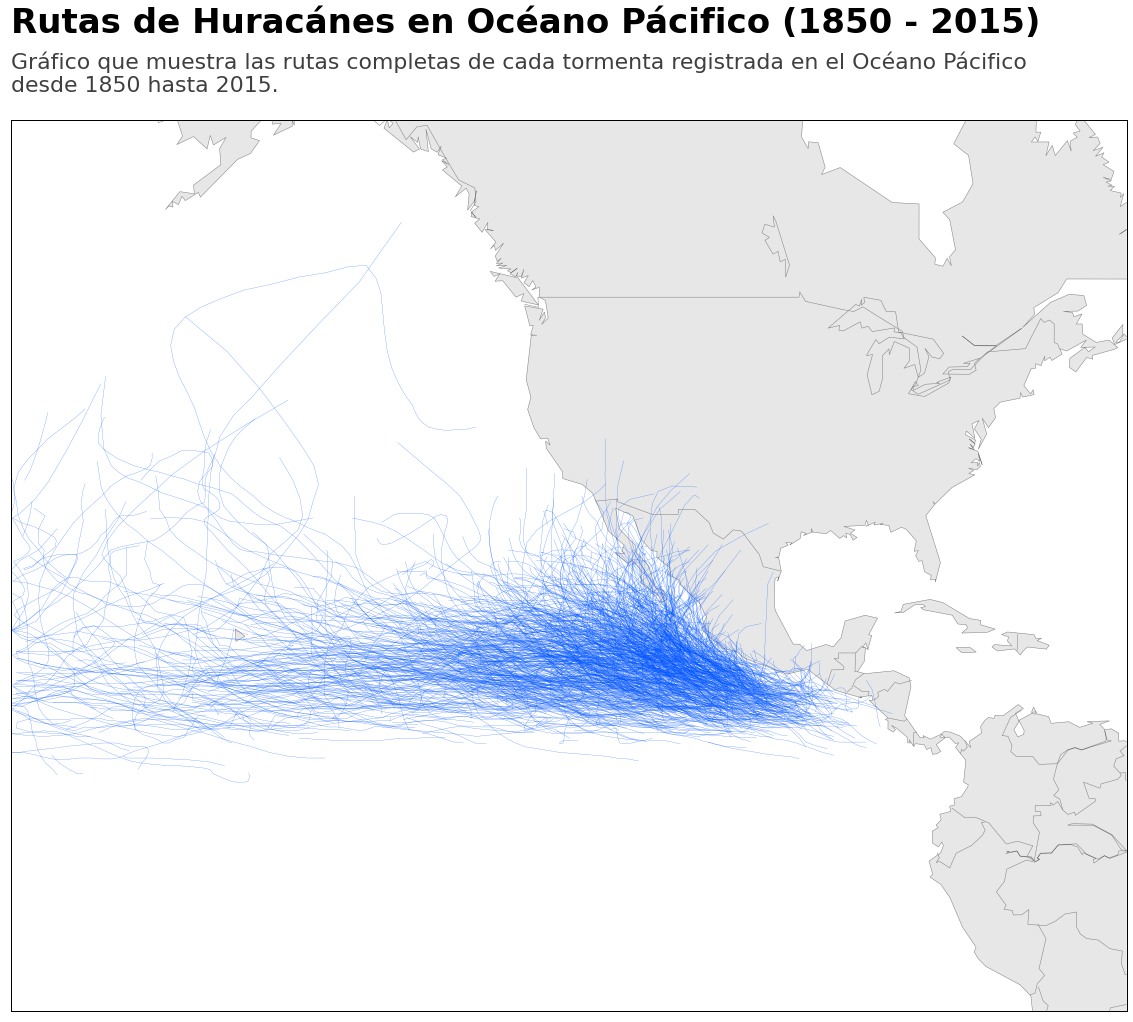

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon = -180, llcrnrlat = -20,
    urcrnrlon = -60, urcrnrlat = 60  
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

LandfallStorms = H_pacifico
LandfallStorms_Unique = LandfallStorms.ID.unique()

for stormid in LandfallStorms_Unique:
      temp_db = H_pacifico[H_pacifico.ID == stormid]
      lat_storm = temp_db.Latitude.values
      lon_storm = temp_db.Longitude.values
      x1, y1 = m(-lon_storm, lat_storm)
      plt.plot(x1,y1,'#0055FF',linewidth=0.2)

plt.text(x=-8*(1), y=11.7*(1000000), s='Rutas de Huracánes en Océano Pácifico (1850 - 2015)', fontsize=34, weight='bold')

plt.text(x=-5*(1), y=11*(1000000), s='Gráfico que muestra las rutas completas de cada tormenta registrada en el Océano Pácifico \ndesde 1850 hasta 2015.', fontsize=22, alpha=0.75)

plt.savefig("/work/Graph/T_Pac.png", dpi = 300, bbox_inches='tight')

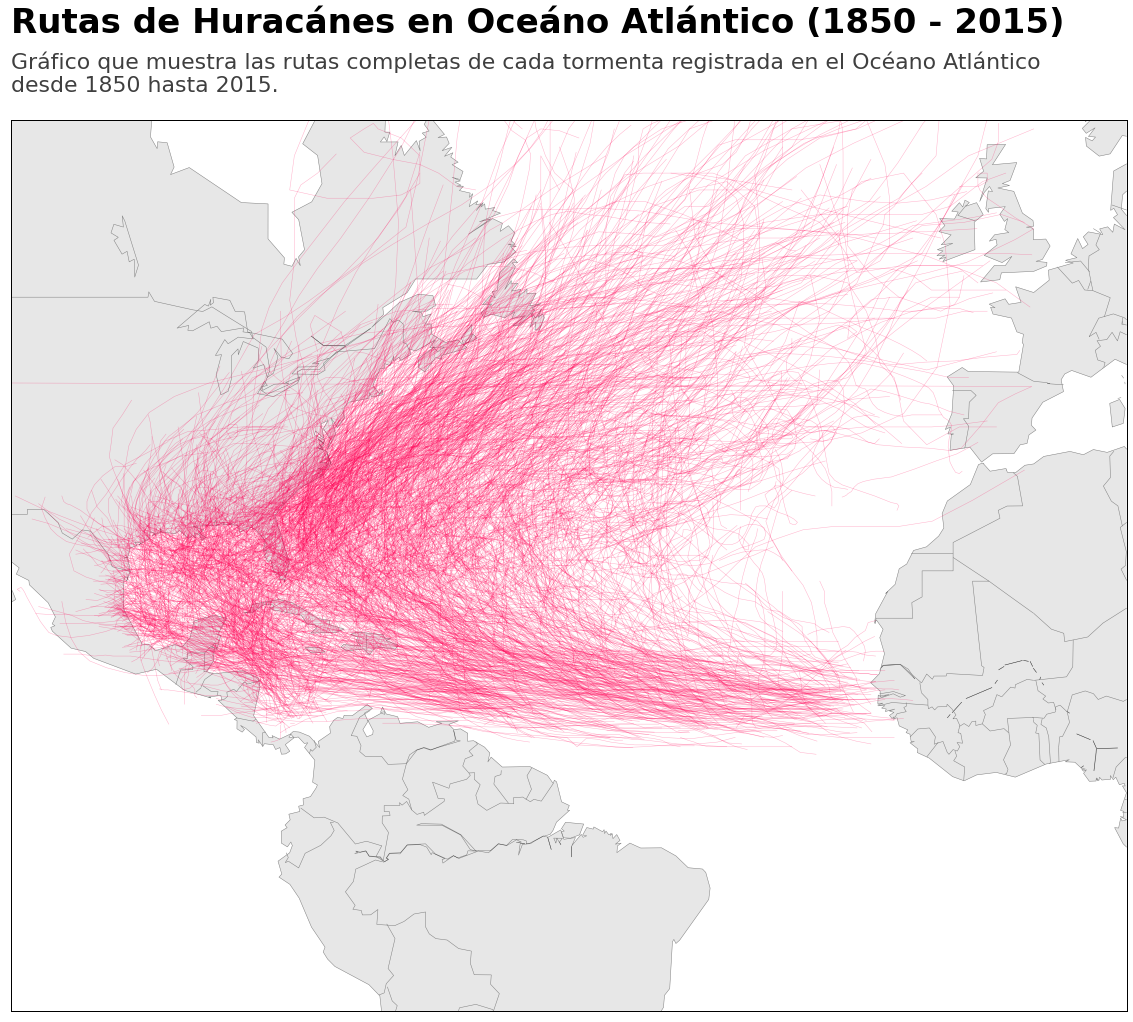

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon = -110, llcrnrlat = -20,
    urcrnrlon = 10, urcrnrlat = 60
    )

#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

LandfallStorms = H_atlantico
LandfallStorms_Unique = LandfallStorms.ID.unique()

for stormid in LandfallStorms_Unique:
      temp_db = H_atlantico[H_atlantico.ID == stormid]
      lat_storm = temp_db.Latitude.values
      lon_storm = temp_db.Longitude.values
      x1, y1 = m(-lon_storm,lat_storm)
      plt.plot(x1,y1,'#FF0055',linewidth=0.5, alpha=0.3)


plt.text(x=-8*(1), y=11.7*(1000000), s='Rutas de Huracánes en Oceáno Atlántico (1850 - 2015)', fontsize=34, weight='bold')

plt.text(x=-5*(1), y=11*(1000000), s='Gráfico que muestra las rutas completas de cada tormenta registrada en el Océano Atlántico \ndesde 1850 hasta 2015.', fontsize=22, alpha=0.75)

plt.savefig("/work/Graph/T_Atl.png", dpi = 300, bbox_inches='tight')

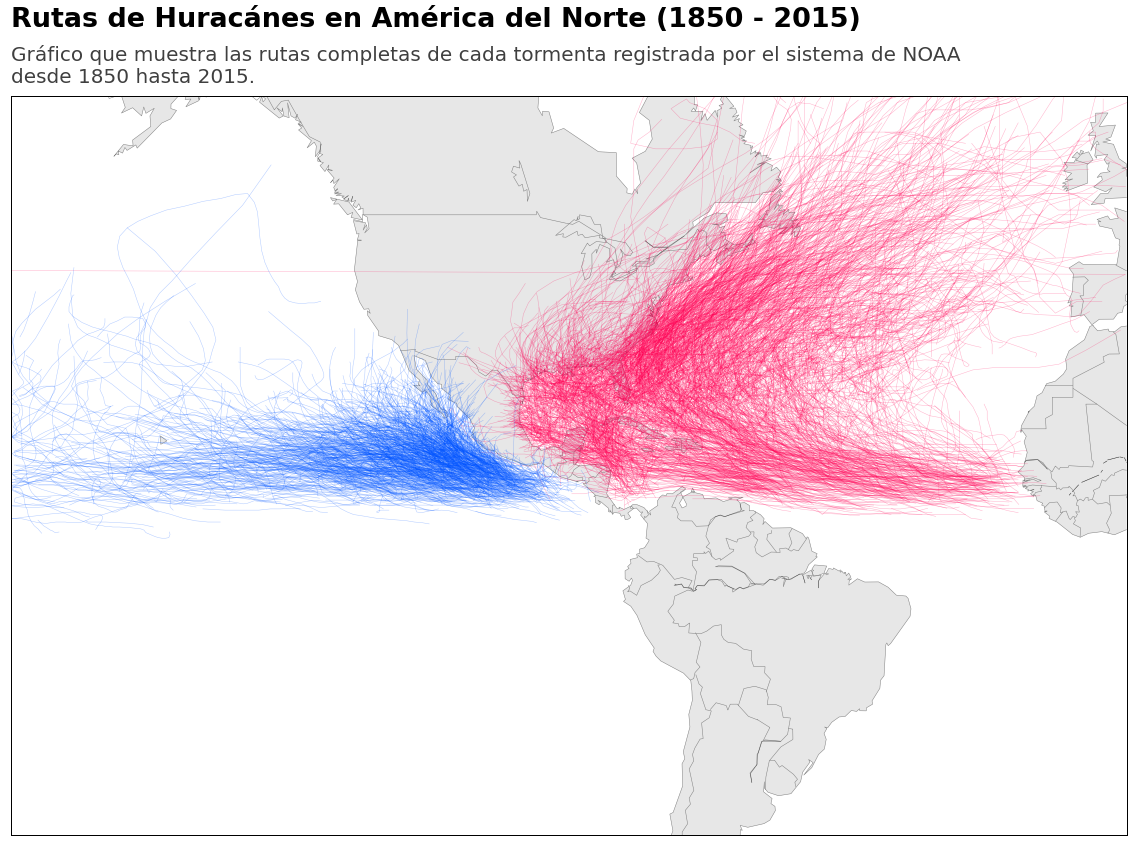

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon = -180, llcrnrlat = -40,
    urcrnrlon = 0, urcrnrlat = 60
    )

#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

LandfallStorms = H_atlantico
LandfallStorms_Unique = LandfallStorms.ID.unique()

for stormid in LandfallStorms_Unique:
      temp_db = H_atlantico[H_atlantico.ID == stormid]
      lat_storm = temp_db.Latitude.values
      lon_storm = temp_db.Longitude.values
      x1, y1 = m(-lon_storm,lat_storm)
      plt.plot(x1,y1,'#FF0055',linewidth=0.5, alpha=0.3)

LandfallStorms = H_pacifico
LandfallStorms_Unique = LandfallStorms.ID.unique()

for stormid in LandfallStorms_Unique:
      temp_db = H_pacifico[H_pacifico.ID == stormid]
      lat_storm = temp_db.Latitude.values
      lon_storm = temp_db.Longitude.values
      x1, y1 = m(-lon_storm, lat_storm)
      plt.plot(x1,y1,'#0055FF',linewidth=0.5, alpha=0.3)

plt.text(x=-8*(1), y=14.5*(1000000), s='Rutas de Huracánes en América del Norte (1850 - 2015)', fontsize=27, weight='bold')

plt.text(x=-5*(1), y=13.5*(1000000), s='Gráfico que muestra las rutas completas de cada tormenta registrada por el sistema de NOAA \ndesde 1850 hasta 2015.', fontsize=20, alpha=0.75)

plt.savefig("/work/Graph/Tray.png", dpi = 300, bbox_inches='tight')

Pic para la portada de la presentación.

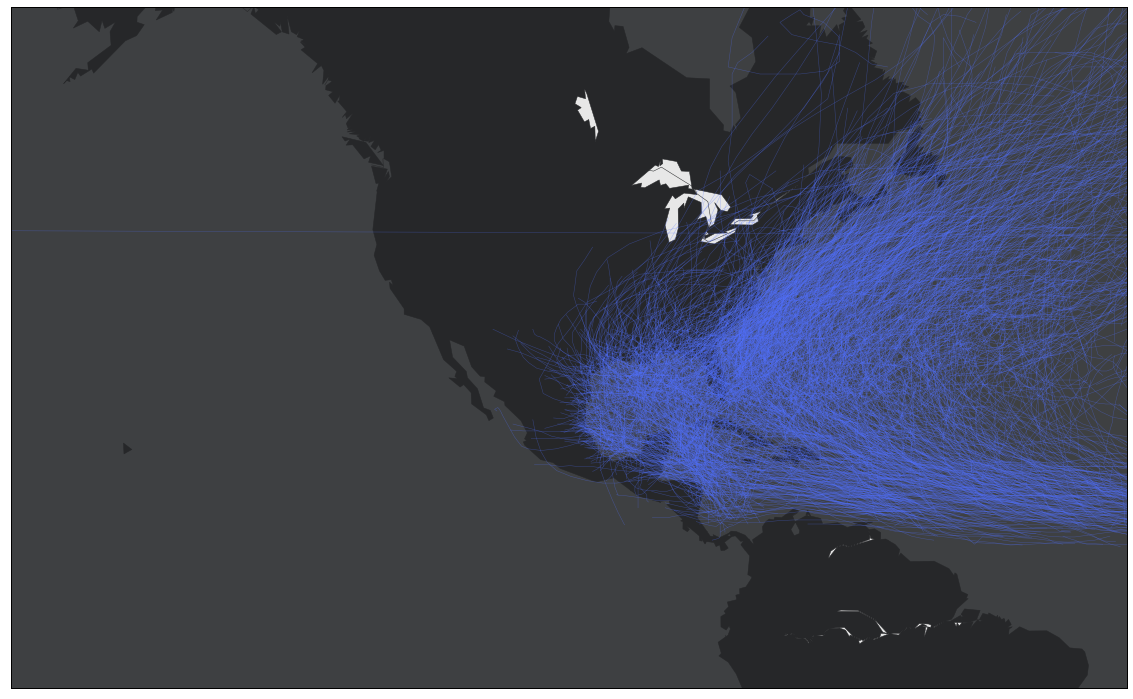

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon = -170, llcrnrlat = -10,
    urcrnrlon = -30, urcrnrlat = 60
    )

#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#3E4042')

# Continent in green
m.fillcontinents(color='#262729',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='#262729', linewidth=0.5)
m.drawcountries(color='#262729')
#m.drawstates(color='gray')

LandfallStorms = H_atlantico
LandfallStorms_Unique = LandfallStorms.ID.unique()

for stormid in LandfallStorms_Unique:
      temp_db = H_atlantico[H_atlantico.ID == stormid]
      lat_storm = temp_db.Latitude.values
      lon_storm = temp_db.Longitude.values
      x1, y1 = m(-lon_storm,lat_storm)
      plt.plot(x1,y1,'#5271FF',linewidth=0.5, alpha=0.4)

LandfallStorms = H_pacifico
LandfallStorms_Unique = LandfallStorms.ID.unique()

plt.savefig("/work/Graph/portada.png", dpi = 300, bbox_inches='tight')

2. Número de Huracanes por mes

In [ ]:
Huracanes = pd.concat([H_pacifico, H_atlantico])
Huracanes = Huracanes[Huracanes.Status == ' HU']
Huracanes['year'] = Huracanes.Date.dt.year
Huracanes

ID                 Name       Date      Time Status  Latitude  \
57     EP041949              UNNAMED 1949-09-09  12:00:00     HU      19.3   
58     EP041949              UNNAMED 1949-09-09  18:00:00     HU      20.2   
59     EP041949              UNNAMED 1949-09-10  00:00:00     HU      21.2   
60     EP041949              UNNAMED 1949-09-10  06:00:00     HU      21.8   
61     EP041949              UNNAMED 1949-09-10  12:00:00     HU      22.5   
...         ...                  ...        ...       ...    ...       ...   
49053  AL112015              JOAQUIN 2015-10-07  06:00:00     HU      40.3   
49094  AL122015                 KATE 2015-11-11  00:00:00     HU      33.1   
49095  AL122015                 KATE 2015-11-11  06:00:00     HU      35.2   
49096  AL122015                 KATE 2015-11-11  12:00:00     HU      36.2   
49097  AL122015                 KATE 2015-11-11  18:00:00     HU      37.6   

       Longitude  Maximum Wind  Year Month Day Hour Minute  \
57         108.6            75  1949    09  09   12     00   
58         109.4            75  1949    09  09   18     00   
59         110.2            75  1949    09  10   00     00   
60         110.6            75  1949    09  10   06     00   
61         110.9            75  1949    09  10   12     00   
...          ...           ...   ...   ...  ..  ...    ...   
49053       51.5            65  2015    10  07   06     00   
49094       71.3            65  2015    11  11   00     00   
49095       67.6            70  2015    11  11   06     00   
49096       62.5            75  2015    11  11   12     00   
49097       58.2            65  2015    11  11   18     00   

                 Datetime  year  
57    1949-09-09 12:00:00  1949  
58    1949-09-09 18:00:00  1949  
59    1949-09-10 00:00:00  1949  
60    1949-09-10 06:00:00  1949  
61    1949-09-10 12:00:00  1949  
...                   ...   ...  
49053 2015-10-07 06:00:00  2015  
49094 2015-11-11 00:00:00  2015  
49095 2015-11-11 06:00:00  2015  
49096 2015-11-11 12:00:00  2015  
49097 2015-11-11 18:00:00  2015  

[21302 rows x 15 columns]

In [ ]:
# Huracanes de forma mensual:

Hur_hist = Huracanes[['Date', 'ID', 'Hour', 'Minute']]
Hur_hist = Hur_hist[Hur_hist.Hour == '00']
Hur_hist = Hur_hist[Hur_hist.Minute == '00']

Hur_hist = Hur_hist.groupby(by = ['Date']).count().reset_index()

Hur_hist['month'] = Hur_hist.Date.dt.month
Hur_hist['day'] = Hur_hist.Date.dt.day
Hur_hist['year'] = Hur_hist.Date.dt.year

Hur_hist.set_index('Date', inplace = True)

In [ ]:
import seaborn as sns
from pathlib import Path
from datetime import date
from pandas.tseries.offsets import MonthEnd

sns.set_style("whitegrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
# Gráfica de barras

3. Huracanes por año de forma historica

In [ ]:
Hur_año = Huracanes.drop_duplicates(subset = "ID")
Hur_año = Hur_año[['Date', 'ID']]

Hur_año['month'] = Hur_año.Date.dt.month
Hur_año['day'] = Hur_año.Date.dt.day
Hur_año['year'] = Hur_año.Date.dt.year

Hur_año = Hur_año.groupby(by = ['year']).count().reset_index()

In [ ]:
Hur_año

year  Date  ID  month  day
0    1851     3   3      3    3
1    1852     5   5      5    5
2    1853     4   4      4    4
3    1854     3   3      3    3
4    1855     4   4      4    4
..    ...   ...  ..    ...  ...
158  2011    17  17     17   17
159  2012    20  20     20   20
160  2013    12  12     12   12
161  2014    22  22     22   22
162  2015    17  17     17   17

[163 rows x 5 columns]

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


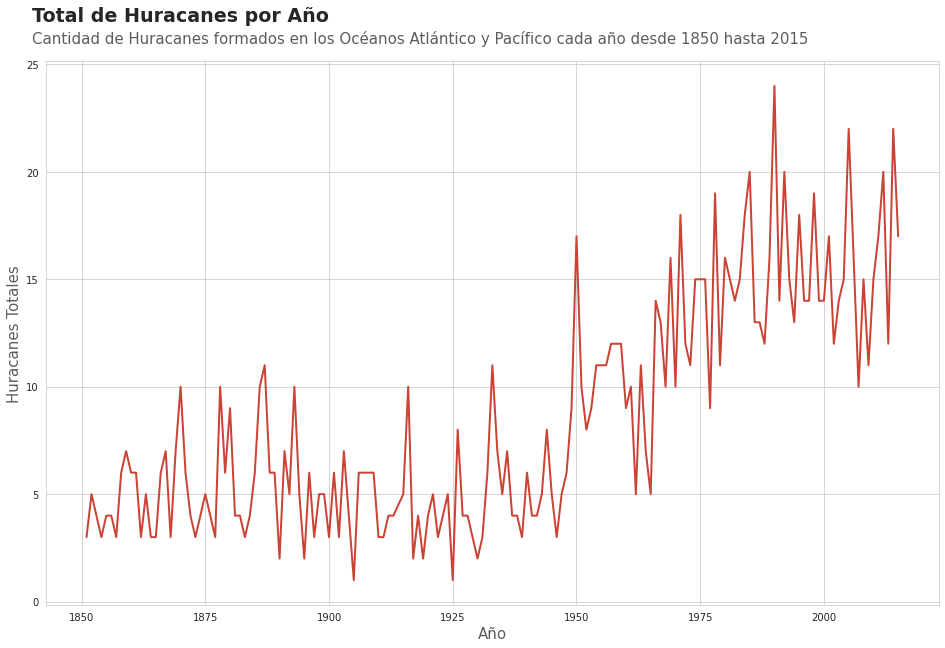

In [ ]:
# Grafica de barras


plt.figure(figsize=(16, 10))
sns.lineplot(Hur_año.year, Hur_año.ID, err_style=None, color = '#CB4335', lw=2)

plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Huracanes Totales', fontsize=15, alpha=0.75)

plt.text(x=1840, y=27, s='Total de Huracanes por Año', fontsize=19, weight='bold')
plt.text(x=1840, y=26, s='Cantidad de Huracanes formados en los Océanos Atlántico y Pacífico cada año desde 1850 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/Total_año.png", dpi = 300, bbox_inches='tight')


4. Duración de los Huracanes

In [ ]:
import datetime

Duracion = Huracanes[(Huracanes.Status == ' HU') & (Huracanes.Time == datetime.time(0, 0))]
Duracion['year'] = Duracion.Date.dt.year

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
tiempo = []
año = []
for i in Duracion.ID.unique():
    tiempo.append(len(Duracion[Duracion.ID == i]))
    año.append(Duracion[Duracion.ID == i]['year'].iloc[0])

data = {'ID': list(Duracion.ID.unique()),
        'duracion': tiempo, 
        'year':año
        }

Hur_durr = pd.DataFrame(data)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


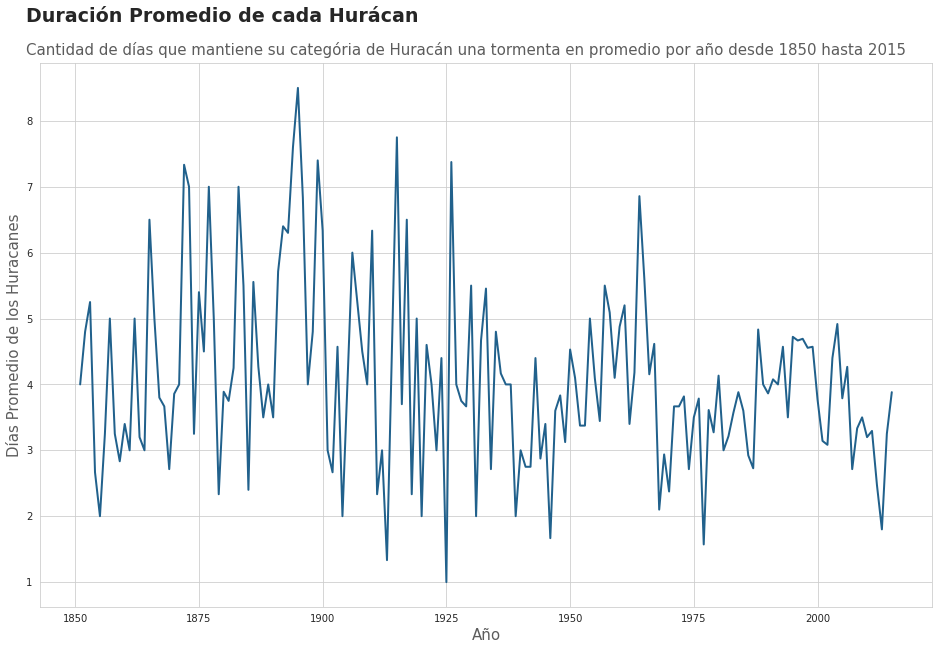

In [ ]:
dur_prom = Hur_durr.groupby('year').mean()
# Gráfica Promedios
plt.figure(figsize=(16, 10))
sns.lineplot(dur_prom.index, dur_prom.duracion, err_style=None, color = '#21618C', lw=2)

plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Días Promedio de los Huracanes', fontsize=15, alpha=0.75)

plt.text(x=1840, y=9.5, s='Duración Promedio de cada Hurácan', fontsize=19, weight='bold')
plt.text(x=1840, y=9, s='Cantidad de días que mantiene su categória de Huracán una tormenta en promedio por año desde 1850 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/duracion_año.png", dpi = 300, bbox_inches='tight')


5. Intensidad de los huracanes de forma historica

In [ ]:
Duracion = Huracanes[(Huracanes.Status == ' HU')]
Duracion['year'] = Duracion.Date.dt.year

In [ ]:
Intensidad = Duracion.groupby('ID').max()
Intensidad = Intensidad[['Maximum Wind', 'year']]
Intensidad = Intensidad.reset_index()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


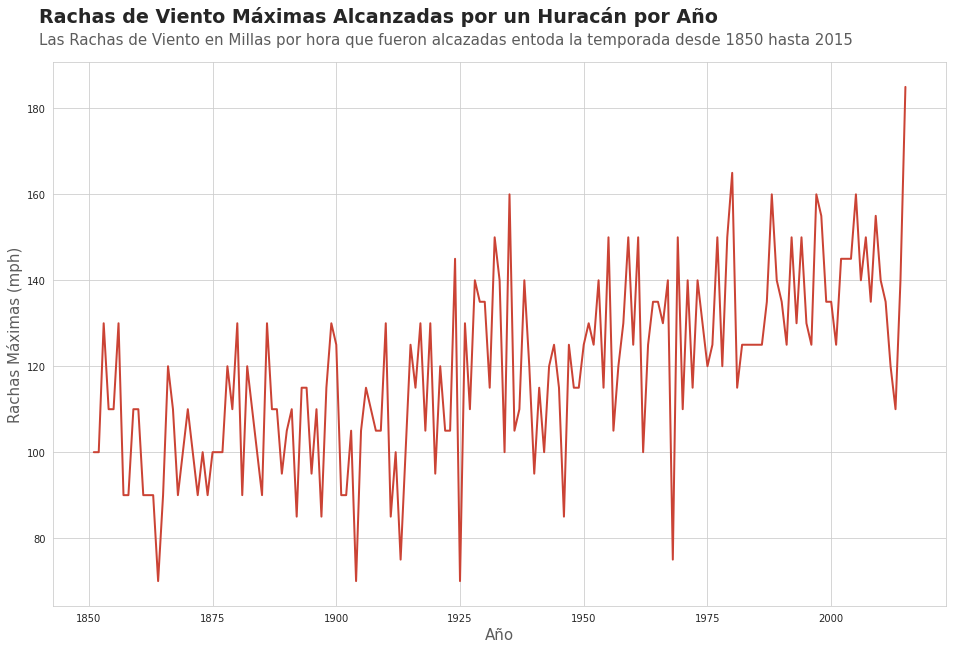

In [ ]:
int_prom = Intensidad.groupby('year').max()
# Gráfica Maximo
plt.figure(figsize=(16, 10))
sns.lineplot(int_prom.index, int_prom['Maximum Wind'], err_style=None, color = '#CB4335', lw=2)

plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Rachas Máximas (mph)', fontsize=15, alpha=0.75)

plt.text(x=1840, y=200, s='Rachas de Viento Máximas Alcanzadas por un Huracán por Año', fontsize=19, weight='bold')
plt.text(x=1840, y=195, s='Las Rachas de Viento en Millas por hora que fueron alcazadas entoda la temporada desde 1850 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/rach_max.png", dpi = 300, bbox_inches='tight')


In [ ]:
Wilma = pd.concat([H_pacifico, H_atlantico])

In [ ]:
Wilma['year'] = Wilma.Date.dt.year

In [ ]:
Agnes = Wilma[(Wilma.Status == ' HU')]
Agnes=Wilma[['ID','year']]

In [ ]:
Agnes.shape

(75242, 2)

In [ ]:
freq = Agnes.groupby(['year']).count()
print(freq)

        ID
year      
1851    98
1852   134
1853   100
1854    60
1855    35
...    ...
2011   968
2012  1154
2013   914
2014  1140
2015  1056

[165 rows x 1 columns]


In [ ]:
ochocinco=freq['ID'][0:10].sum()
ochoseis=freq['ID'][11:20].sum()
ochosiete=freq['ID'][21:30].sum()
ochoocho=freq['ID'][31:40].sum()
ochonueve=freq['ID'][41:50].sum()
nueve=freq['ID'][51:60].sum()
nueveuno=freq['ID'][61:70].sum()
nuevedos=freq['ID'][71:80].sum()
nuevetres=freq['ID'][81:90].sum()
nuevecuatro=freq['ID'][91:100].sum()
nuevecinco=freq['ID'][101:110].sum()
nueveseis=freq['ID'][111:120].sum()
nuevesiete=freq['ID'][121:130].sum()
nueveocho=freq['ID'][131:140].sum()
nuevenueve=freq['ID'][141:150].sum()
dos=freq['ID'][151:160].sum()
dosuno=freq['ID'][161:165].sum()

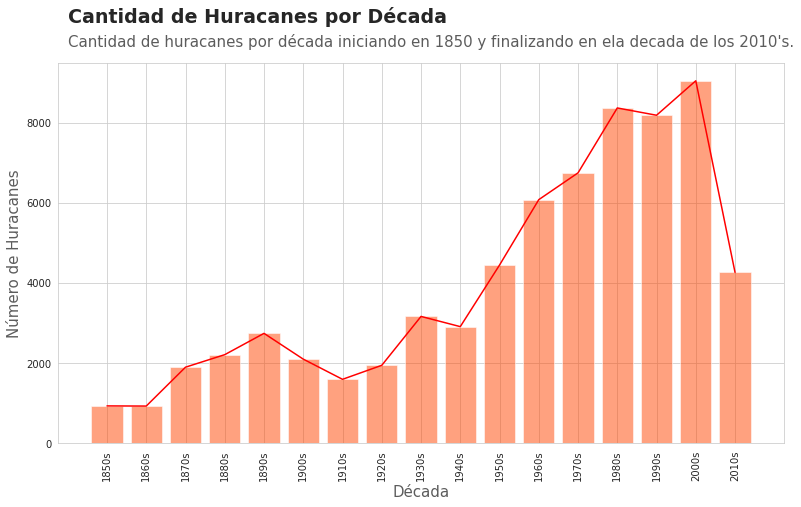

In [ ]:
import matplotlib.pyplot as plt
eje_x=['1850s','1860s','1870s','1880s','1890s','1900s','1910s','1920s','1930s','1940s','1950s','1960s',
'1970s','1980s','1990s','2000s','2010s']
eje_y=[ochocinco,ochoseis,ochosiete,ochoocho,ochonueve,nueve,nueveuno,nuevedos,nuevetres,nuevecuatro,
nuevecinco,nueveseis,nuevesiete,nueveocho,nuevenueve,dos,dosuno]
plt.figure(figsize=(13,7))
plt.bar(eje_x,eje_y, alpha=0.5, color=['orangered'])

plt.plot(eje_x,eje_y, color='red')
plt.xticks(rotation=90)


plt.xlabel('Década', fontsize=15, alpha=0.75)
plt.ylabel('Número de Huracanes', fontsize=15, alpha=0.75)

plt.text(x=-1, y=10500, s='Cantidad de Huracanes por Década', fontsize=19, weight='bold')
plt.text(x=-1, y=9900, s='Cantidad de huracanes por década iniciando en 1850 y finalizando en ela decada de los 2010\'s.', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/hist_dec.png", dpi = 300, bbox_inches='tight')


plt.show()



In [ ]:
Katrina=Wilma[['ID','Status','year']]
Katrina.head(3)

ID Status  year
0  EP011949     TS  1949
1  EP011949     TS  1949
2  EP011949     TS  1949

In [ ]:
Katrina=Katrina.drop_duplicates()

In [ ]:
freq_status = Katrina.groupby(['Status']).count()
print(freq_status)

          ID  year
Status            
 DB       25    25
 ET       69    69
 EX      706   706
 HU     1398  1398
 HU        1     1
 LO      346   346
 PT        1     1
 SD       61    61
 SS       77    77
 ST        1     1
 TD     2196  2196
 TS     2406  2406
 WV       14    14


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


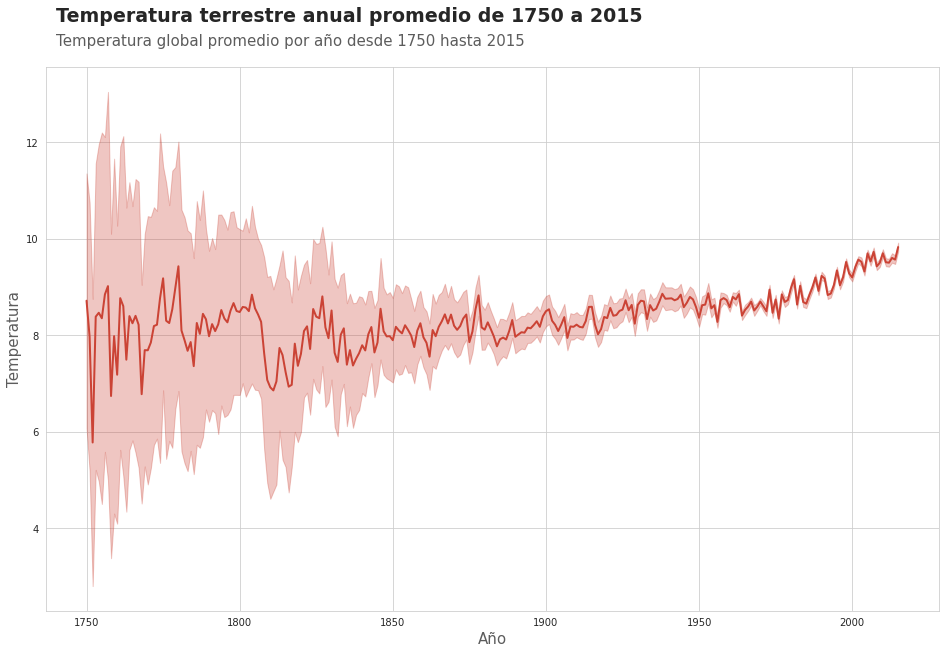

In [ ]:
T_anio = T_global.groupby(by = ['Year']).mean().reset_index()

x, y = T_anio.Year, T_anio.LandAverageTemperature
ci = T_anio.LandAverageTemperatureUncertainty
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(T_anio.Year, T_anio.LandAverageTemperature, color = '#CB4335', lw=2, ax = ax)
ax.fill_between(x, (y-ci), (y+ci), alpha=.3, color = '#CB4335')



plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Temperatura', fontsize=15, alpha=0.75)

plt.text(x=1740, y=14.5, s='Temperatura terrestre anual promedio de 1750 a 2015', fontsize=19, weight='bold')
plt.text(x=1740, y=14, s='Temperatura global promedio por año desde 1750 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/tem_año.png", dpi = 300, bbox_inches='tight')

plt.show()

In [ ]:
# T_anio = T_global.groupby(by = ['Year']).mean().reset_index()
T_anio_nn = T_anio[100:]

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


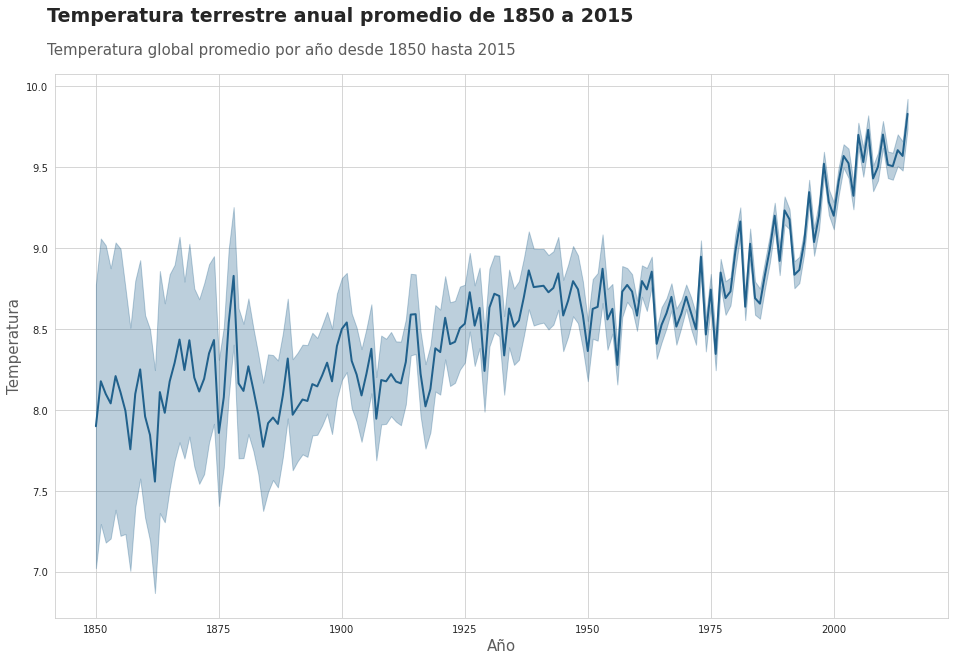

In [ ]:
x, y = T_anio_nn.Year, T_anio_nn.LandAverageTemperature
ci = T_anio_nn.LandAverageTemperatureUncertainty
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(x, y, color = '#21618C', lw=2, ax = ax)
ax.fill_between(x, (y-ci), (y+ci), alpha=.3, color = '#21618C')


plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Temperatura', fontsize=15, alpha=0.75)

plt.text(x=1840, y=10.4, s='Temperatura terrestre anual promedio de 1850 a 2015', fontsize=19, weight='bold')
plt.text(x=1840, y=10.2, s='Temperatura global promedio por año desde 1850 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/tem_anual_1850.png", dpi = 300, bbox_inches='tight')

plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

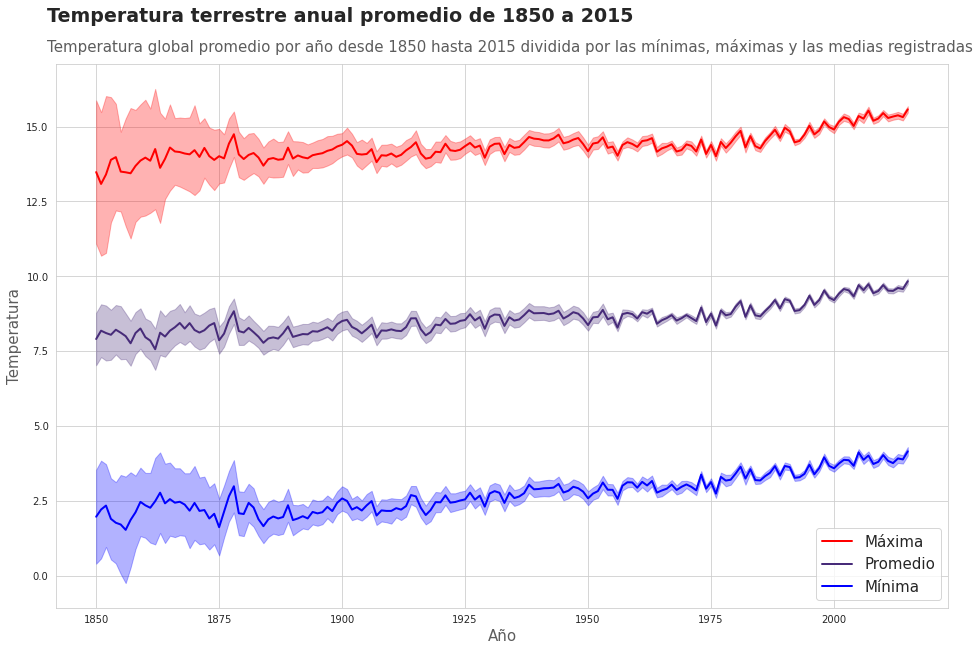

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

x, y = T_anio_nn.Year, T_anio_nn.LandAverageTemperature
ci = T_anio_nn.LandAverageTemperatureUncertainty
y_max = T_anio_nn.LandMaxTemperature
ci_max = T_anio_nn.LandMaxTemperatureUncertainty
y_min = T_anio_nn.LandMinTemperature
ci_min = T_anio_nn.LandMinTemperatureUncertainty

sns.lineplot(x, y_max, color = 'r', lw=2, ax = ax)
sns.lineplot(x, y, color = '#472B79', lw=2, ax = ax)
sns.lineplot(x, y_min, color = 'b', lw=2, ax = ax)

ax.fill_between(x, (y-ci), (y+ci), alpha=.3, color = '#472B79')
ax.fill_between(x, (y_max-ci_max), (y_max+ci_max), alpha=.3, color = 'r')
ax.fill_between(x, (y_min-ci_min), (y_min+ci_min), alpha=.3, color = 'b')


plt.legend(['Máxima', 'Promedio', 'Mínima'], loc = 'lower right', fontsize = 15)
plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Temperatura', fontsize=15, alpha=0.75)

plt.text(x=1840, y=18.5, s='Temperatura terrestre anual promedio de 1850 a 2015', fontsize=19, weight='bold')
plt.text(x=1840, y=17.5, s='Temperatura global promedio por año desde 1850 hasta 2015 dividida por las mínimas, máximas y las medias registradas', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/tem_max_min.png", dpi = 300, bbox_inches='tight')

plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


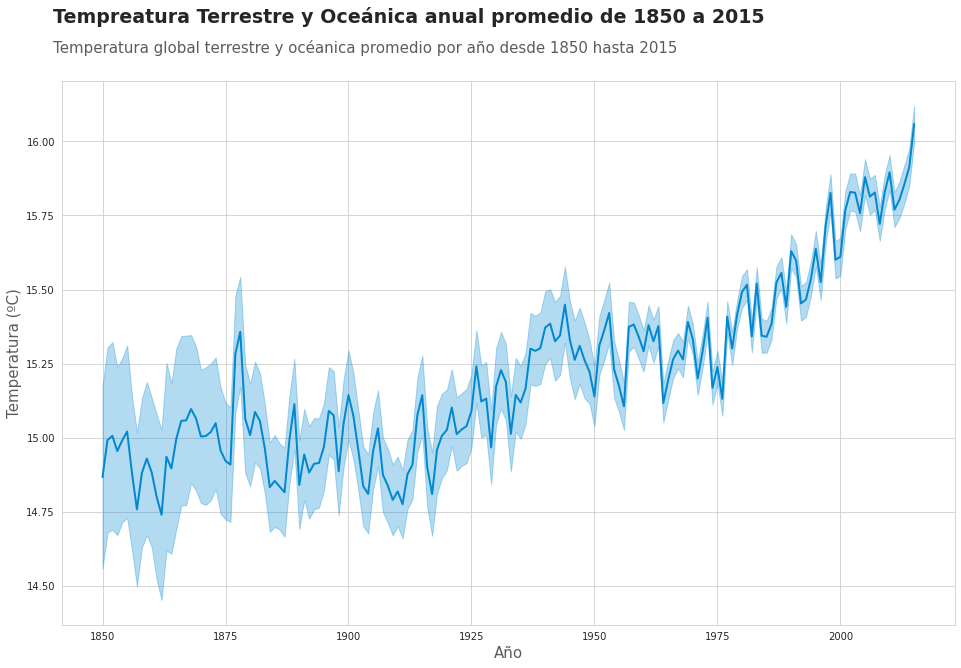

In [ ]:
x, y = T_anio_nn.Year, T_anio_nn.LandAndOceanAverageTemperature
ci = T_anio_nn.LandAndOceanAverageTemperatureUncertainty
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(x, y, color = '#0288D1', lw=2, ax = ax)
ax.fill_between(x, (y-ci), (y+ci), alpha=.3, color = '#0288D1')



plt.xlabel('Año', fontsize=15, alpha=0.75)
plt.ylabel('Temperatura (ºC)', fontsize=15, alpha=0.75)

plt.text(x=1840, y=16.4, s='Tempreatura Terrestre y Oceánica anual promedio de 1850 a 2015', fontsize=19, weight='bold')
plt.text(x=1840, y=16.3, s='Temperatura global terrestre y océanica promedio por año desde 1850 hasta 2015', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/tem_oceano.png", dpi = 300, bbox_inches='tight')

plt.show()

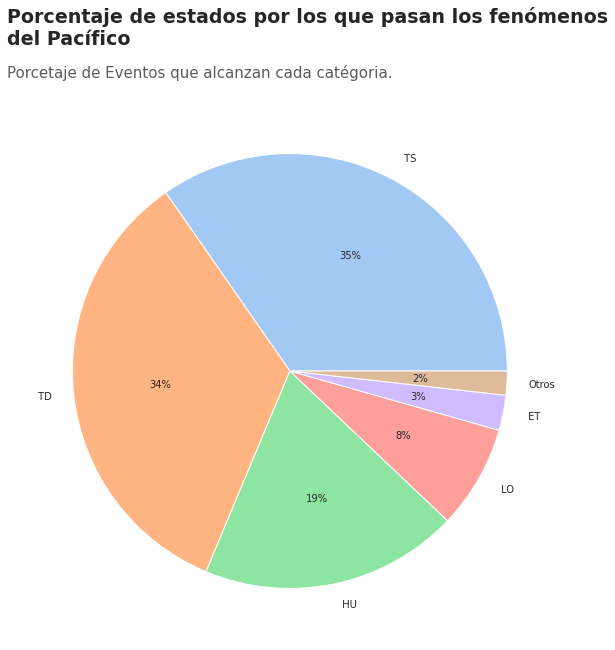

In [ ]:
S_pacifico = H_pacifico.groupby(['ID', 'Status']).count().reset_index()
S_pacifico['Count'] = [1]*len(S_pacifico)
S_pacifico.drop(columns = ['Name', 'Date', 'Time', 'Latitude', 'Longitude', 'Maximum Wind',
                           'Month', 'Year', 'Day', 'Hour', 'Minute', 'Datetime'], inplace= True)
S_pacifico = S_pacifico.groupby(['Status']).sum().sort_values('Count', ascending=False).reset_index()
S_pacifico.loc[len(S_pacifico.index)] = ['Otros', S_pacifico['Count'][5:].sum()]
S_pacifico = S_pacifico.drop([5,6,7,8,9,10,11]).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(16, 10))

colors = sns.color_palette('pastel')[0:6]
plt.pie(S_pacifico['Count'], labels = S_pacifico['Status'], autopct='%.00f%%', colors = colors)

plt.text(x=-1.3, y=1.5, s='Porcentaje de estados por los que pasan los fenómenos\ndel Pacífico', fontsize=19, weight='bold')
plt.text(x=-1.3, y=1.35, s='Porcetaje de Eventos que alcanzan cada catégoria.', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/estados_fen_pac.png", dpi = 300, bbox_inches='tight')

plt.show()

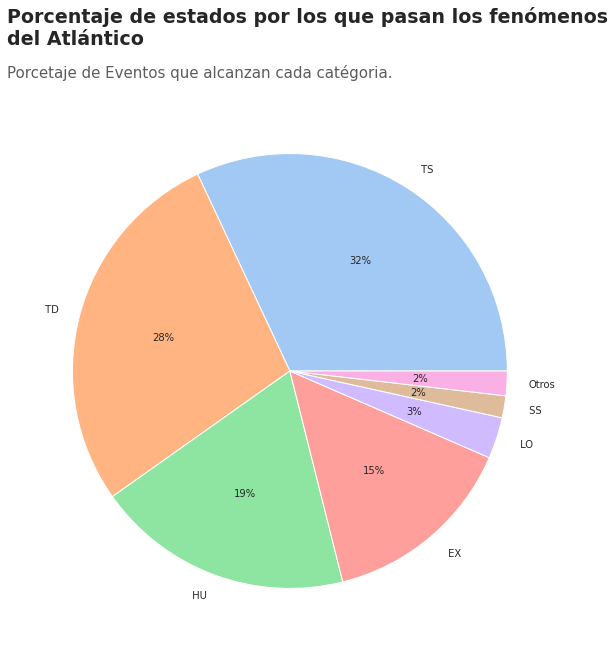

In [ ]:
S_atlantico = H_atlantico.groupby(['ID', 'Status']).count().reset_index()
S_atlantico['Count'] = [1]*len(S_atlantico)
S_atlantico.drop(columns = ['Name', 'Date', 'Time', 'Latitude', 'Longitude', 'Maximum Wind',
                           'Month', 'Year', 'Day', 'Hour', 'Minute', 'Datetime'], inplace= True)
S_atlantico = S_atlantico.groupby(['Status']).sum().sort_values('Count', ascending=False).reset_index()
S_atlantico.loc[len(S_atlantico.index)] = ['Otros', S_atlantico['Count'][6:].sum()]
S_atlantico = S_atlantico.drop([6,7,8]).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(16, 10))


colors = sns.color_palette('pastel')[0:7]
plt.pie(S_atlantico['Count'], labels = S_atlantico['Status'], autopct='%.00f%%', colors = colors)

plt.text(x=-1.3, y=1.5, s='Porcentaje de estados por los que pasan los fenómenos\ndel Atlántico', fontsize=19, weight='bold')
plt.text(x=-1.3, y=1.35, s='Porcetaje de Eventos que alcanzan cada catégoria.', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/estados_fen_atla.png", dpi = 300, bbox_inches='tight')


plt.show()

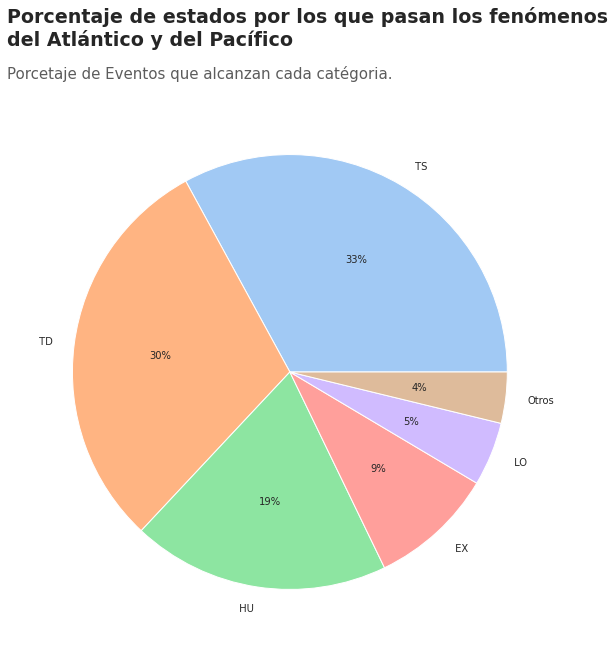

In [ ]:
SPA = pd.concat([S_pacifico, S_atlantico])
SPA = SPA.groupby(['Status']).sum().sort_values('Count', ascending=False).reset_index()

SPA.loc[len(SPA.index)] = ['Otros', SPA['Count'][5:].sum()]
SPA = SPA.drop([5,6,7]).reset_index(drop = True)

fig, ax = plt.subplots(figsize=(16, 10))

colors = sns.color_palette('pastel')[0:8]
plt.pie(SPA['Count'], labels = SPA['Status'], autopct='%.00f%%', colors = colors)

plt.text(x=-1.3, y=1.5, s='Porcentaje de estados por los que pasan los fenómenos\ndel Atlántico y del Pacífico', fontsize=19, weight='bold')
plt.text(x=-1.3, y=1.35, s='Porcetaje de Eventos que alcanzan cada catégoria.', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/estados_fen_total.png", dpi = 300, bbox_inches='tight')


plt.show()

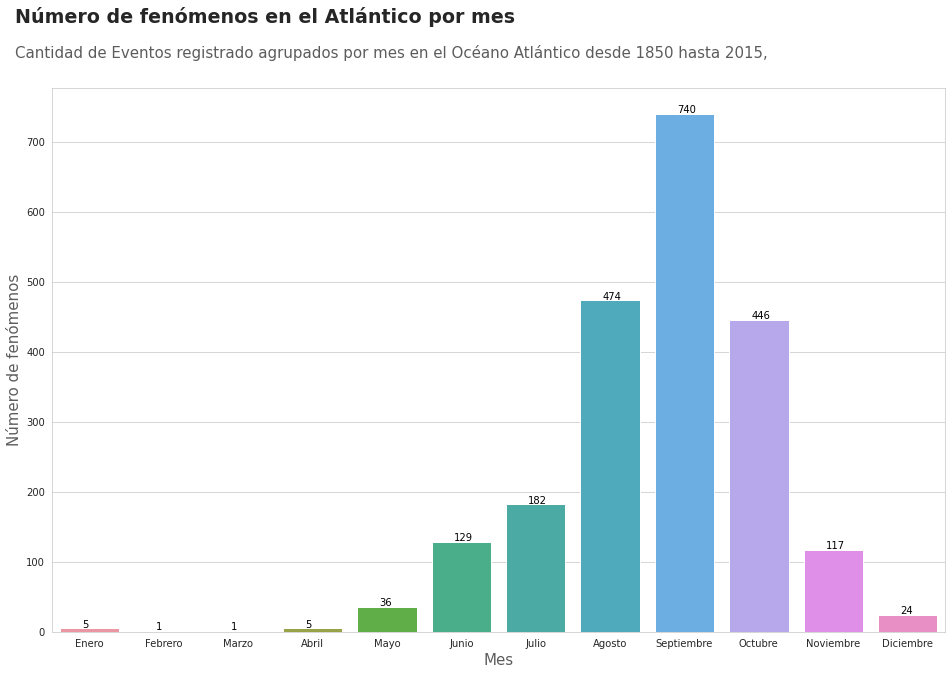

In [ ]:
M_atlantico = H_atlantico.groupby(['ID', 'Month']).count().reset_index()
M_atlantico['Count'] = [1]*len(M_atlantico)
M_atlantico.drop(columns = ['Name', 'Date', 'Time', 'Latitude', 'Longitude', 'Maximum Wind',
                           'Status', 'Year', 'Day', 'Hour', 'Minute', 'Datetime'], inplace= True)
M_atlantico = M_atlantico.groupby(['Month']).sum().sort_values('Month').reset_index()

labels = {'01':'Enero', '02':'Febrero', '03':'Marzo', '04':'Abril', '05':'Mayo', '06':'Junio',
            '07':'Julio', '08':'Agosto', '09':'Septiembre', '10':'Octubre', '11':'Noviembre', '12':'Diciembre'}
M_atlantico['Month'] = M_atlantico['Month'].map(labels)

fig, ax = plt.subplots(figsize=(16, 10))

# Etiquetas de las temperaturas
for index, value in enumerate(M_atlantico['Count']): 
    label = '{:,}'.format(value)
    plt.annotate(label, xy=(index - 0.10, value+1), color='black')

sns.barplot(x='Month', y='Count',data=M_atlantico)

plt.xlabel('Mes', fontsize=15, alpha=0.75)
plt.ylabel('Número de fenómenos', fontsize=15, alpha=0.75)



plt.text(x=-1, y=870, s='Número de fenómenos en el Atlántico por mes', fontsize=19, weight='bold')
plt.text(x=-1, y=820, s='Cantidad de Eventos registrado agrupados por mes en el Océano Atlántico desde 1850 hasta 2015,', fontsize=15, alpha=0.75)

#plt.savefig("/work/Graph/num_atla.png", dpi = 300, bbox_inches='tight')

plt.show()


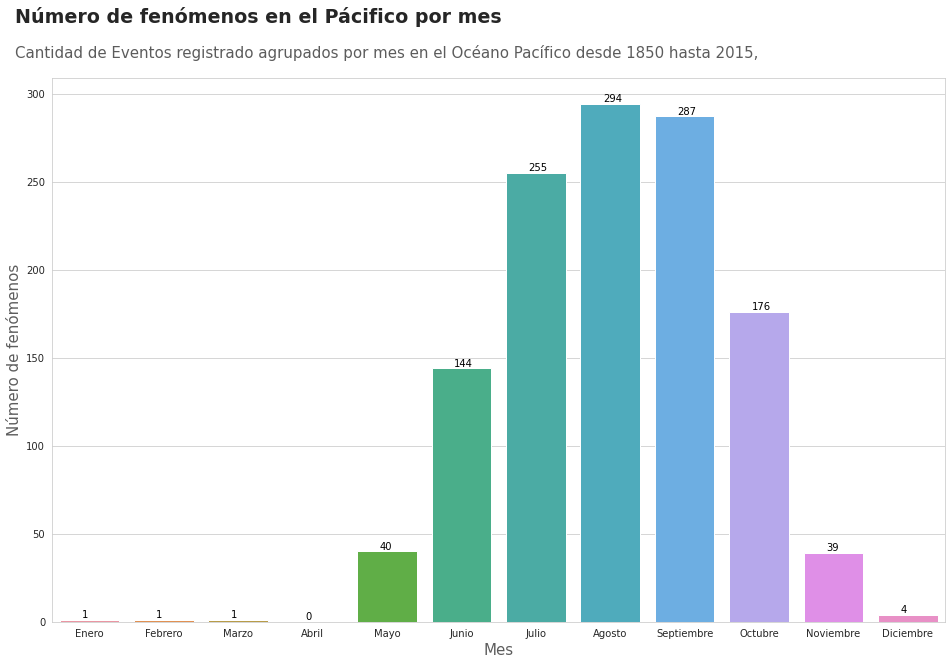

In [ ]:
M_pacifico = H_pacifico.groupby(['ID', 'Month']).count().reset_index()
M_pacifico['Count'] = [1]*len(M_pacifico)
M_pacifico.drop(columns = ['Name', 'Date', 'Time', 'Latitude', 'Longitude', 'Maximum Wind',
                           'Status', 'Year', 'Day', 'Hour', 'Minute', 'Datetime'], inplace= True)
M_pacifico.loc[len(M_pacifico.index)] = ['A','04', 0]
M_pacifico = M_pacifico.groupby(['Month']).sum().sort_values('Month').reset_index()
M_pacifico['Month'] = M_pacifico['Month'].map(labels)
fig, ax = plt.subplots(figsize=(16, 10))

# Etiquetas de las temperaturas
for index, value in enumerate(M_pacifico['Count']): 
    label = '{:,}'.format(value)
    plt.annotate(label, xy=(index - 0.10, value+1), color='black')


sns.barplot(x='Month', y='Count',data=M_pacifico)


plt.xlabel('Mes', fontsize=15, alpha=0.75)
plt.ylabel('Número de fenómenos', fontsize=15, alpha=0.75)

plt.text(x=-1, y=340, s='Número de fenómenos en el Pácifico por mes', fontsize=19, weight='bold')
plt.text(x=-1, y=320, s='Cantidad de Eventos registrado agrupados por mes en el Océano Pacífico desde 1850 hasta 2015,', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/num_pac.png", dpi = 300, bbox_inches='tight')

plt.show()


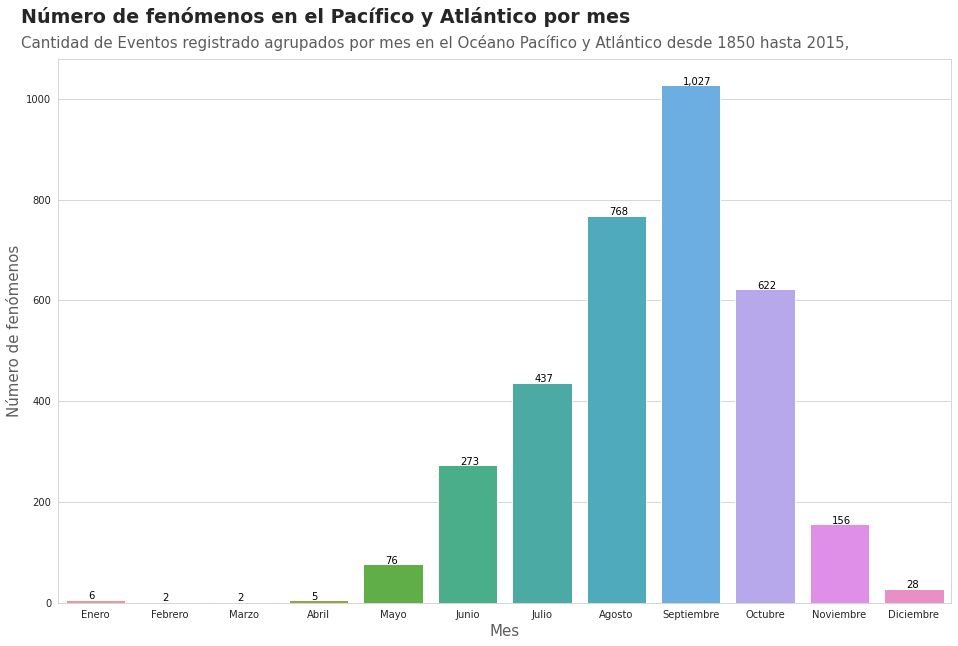

In [ ]:
MPA = pd.concat([M_pacifico, M_atlantico])
MPA = MPA.groupby(['Month']).sum().sort_values('Month').reset_index()

#order =  ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

inverso = {value:key for (key, value) in labels.items()}
MPA['Month'] = MPA['Month'].map(inverso)
MPA = MPA.sort_values('Month').reset_index(drop=True)
MPA['Month'] = MPA['Month'].map(labels)
fig, ax = plt.subplots(figsize=(16, 10))

# Etiquetas de las temperaturas
for index, value in enumerate(MPA['Count']): 
    label = '{:,}'.format(value)
    plt.annotate(label, xy=(index - 0.10, value+1), color='black')


sns.barplot(x='Month', y='Count',data=MPA)


plt.xlabel('Mes', fontsize=15, alpha=0.75)
plt.ylabel('Número de fenómenos', fontsize=15, alpha=0.75)

plt.text(x=-1, y=1150, s='Número de fenómenos en el Pacífico y Atlántico por mes', fontsize=19, weight='bold')
plt.text(x=-1, y=1100, s='Cantidad de Eventos registrado agrupados por mes en el Océano Pacífico y Atlántico desde 1850 hasta 2015,', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/num_total.png", dpi = 300, bbox_inches='tight')

plt.show()

Grfauca de Temperaturas y Cantidad de Huracanes Juntos

In [ ]:
Temp = T_anio_nn[['LandAndOceanAverageTemperature', 'Year']]
Hur_c = Hur_año[['year', 'ID']]

Hur_c.columns = ['Year', 'NHur']

In [ ]:
df = Hur_c.merge(Temp, how='inner', on='Year')

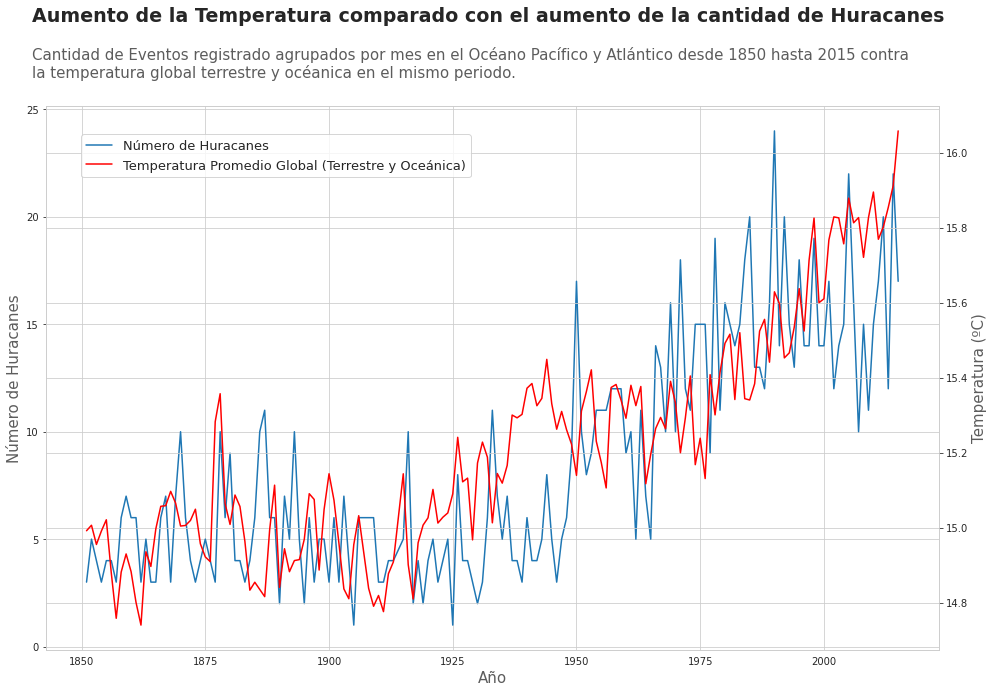

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,10

ax = df.plot(x="Year", y="NHur", legend=False)

ax2 = ax.twinx()
df.plot(x="Year", y="LandAndOceanAverageTemperature", ax=ax2, legend=False, color="r")
#ax.figure.legend()

ax.figure.legend(['Número de Huracanes', 'Temperatura Promedio Global (Terrestre y Oceánica)'], loc='upper left', fontsize = 13, bbox_to_anchor=(0.15, 0.85))

ax.set_xlabel('Año', fontsize=15, alpha=0.75)
ax.set_ylabel('Número de Huracanes', fontsize=15, alpha=0.75)

ax2.set_ylabel('Temperatura (ºC)', fontsize=15, alpha=0.75)

plt.text(x=1840, y=16.35, s='Aumento de la Temperatura comparado con el aumento de la cantidad de Huracanes', fontsize=19, weight='bold')
plt.text(x=1840, y=16.2, s='Cantidad de Eventos registrado agrupados por mes en el Océano Pacífico y Atlántico desde 1850 hasta 2015 contra\nla temperatura global terrestre y océanica en el mismo periodo.', fontsize=15, alpha=0.75)

plt.savefig("/work/Graph/num_temp_corr.png", dpi = 300, bbox_inches='tight')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87ae4059-470e-47ce-94d7-d278dff7bf1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>